# Twinsage Glintstone Crown considered harmful

__TLDR:__ While the crown has the benefit of 6 extra Intelligence, it requires at least 2 points in Vigor and 6 points in Endurance
to compensate for the loss in HP/Stamina.

[Twinsage Glintstone Crown](https://eldenring.wiki.fextralife.com/Twinsage+Glintstone+Crown) is
regarded as one of the more popular options for early game mage/sorcerer builds, raising
Intelligence by 6 points at a 9% cost to HP and Stamina. The different units (points vs percentages)
make it difficult to compare the costs and benefits of equipping the crown. Without clear data there is a question
of whether equipping the crown is worth it at all. This notebook tries to answer that question.

We're going to be using pandas and matplotlib. The [Vigor](https://eldenring.wiki.fextralife.com/Vigor) to HP
and [Endurance](https://eldenring.wiki.fextralife.com/Endurance) to Stamina stats were gathered from the Elden Ring Wiki.
Let's start off by loading the values, applying a 9% loss and plotting the HP/Stamina values against Vigor/Endurance points:

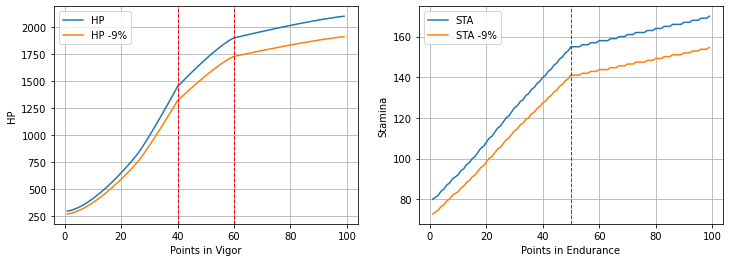

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/stats.csv')
df.index += 1 # csv is 0-indexed, points start from 1
df['HP -9%'] = df['HP'] * 0.91
df['STA -9%'] = df['STA'] * 0.91

fig, axes = plt.subplots(1,2, figsize=(12,4))

hp_plot = df.loc[:,['HP', 'HP -9%']].plot(ax=axes[0])
hp_plot.set_xlabel('Points in Vigor')
hp_plot.set_ylabel('HP')
hp_plot.grid(True)
hp_plot.axvline(x=40, color='red', ls='--', lw=1)
hp_plot.axvline(x=60, color='red', ls='--', lw=1)

sta_plot = df.loc[:,['STA', 'STA -9%']].plot(ax=axes[1])
sta_plot.set_xlabel('Points in Endurance')
sta_plot.set_ylabel('Stamina')
sta_plot.grid(True)
sta_plot.axvline(x=50, color='red', ls='--', lw=1)

There are a few interesting things to note here. HP per point of Vigor actually increases up to 40 Vigor,
making each point of Vigor more valuable than the previous. Points 40-60 increase HP more linearly and points after 60 are worth much less. FromSoftware seems to have started off with a nice curve to map Vigor
to HP, then "sliced" off the bump in between 40-60, I assume to fine-tune the progression.
Stamina scales linearly with a soft cap of 50 Endurance.

We can also see the 9% loss from equipping the crown at any amount of points in Vigor/Endurance. However, comparing the
loss of HP/Stamina in absolute values to the benefits of 6 extra points in Intelligence is still difficult. What we really need is
to map the -9% HP/Stamina back to points of Vigor and Endurance we have lost by equipping the crown.

We can do that by finding the amount of points in Vigor/Endurance that would be required to reach the amount of
HP/Stamina after the 9% loss. We'll make use of fractional points to reflect values in between. The table below shows everything we have gathered so far, for Vigor/Endurance points 9-15:

In [2]:
def value_to_points(stat: int, series: pd.Series) -> int:
    if stat < series.iloc[0]:
        return None # negative points are not possible
    for index, value in series.items():
        if stat < value:
            lower_value = series[index - 1]
            # we express the progress towards the next value as a fraction of a point
            pt_extra = (stat - lower_value) / (value - lower_value)
            return index - 1 + pt_extra

df['HP -9% to VIG'] = df['HP -9%'].apply(value_to_points, args=(df['HP'],))
df['STA -9% to END'] = df['STA -9%'].apply(value_to_points, args=(df['STA'],))

df['VIG Cost'] = df.index - df['HP -9% to VIG']
df['END Cost'] = df.index - df['STA -9% to END']

df[8:15]

,HP,STA,HP -9%,STA -9%,HP -9% to VIG,STA -9% to END,VIG Cost,END Cost
9,396,91,360.36,82.81,6.890667,3.405,2.109333,5.595
10,414,92,376.74,83.72,7.921250,3.860,2.078750,6.140
11,434,94,394.94,85.54,8.941111,5.270,2.058889,5.730
12,455,95,414.05,86.45,10.002500,5.725,1.997500,6.275
13,476,97,433.16,88.27,10.958000,7.135,2.042000,5.865
14,499,98,454.09,89.18,11.956667,7.590,2.043333,6.410
15,522,100,475.02,91.00,12.953333,9.000,2.046667,6.000


The leftmost column shows the points in the stat. 12 Vigor, for example, would result in 455 HP. After the 9% penalty
from the crown, we would end up with 414.05 HP. This is very close to having 10 Vigor and no crown, or a Vigor cost of
about 2 points. If we only cared about Int and HP, we would end up net-positive. Instead of putting 6 points in Intelligence, we
could equip the crown and compensate the HP loss with 2 points in Vigor. 4 extra points!

The Stamina cost is a different story. 15 Endurance is 100 Stamina, or 91 after the crown. This is equal
to having 9 points in Endurance and no crown, or a 6 point difference. Casting requires Stamina, and many guides suggest
putting at least some points in Endurance to not be starved of it. But with the crown equipped, we need about 6 Endurance extra just to get even!
Also accounting for losses in Vigor, we need 8 extra points to compensate for gaining 6 Intelligence. Let's plot
the stat costs up to 60 points:

Text(0, 0.5, 'Crown Cost in Points')

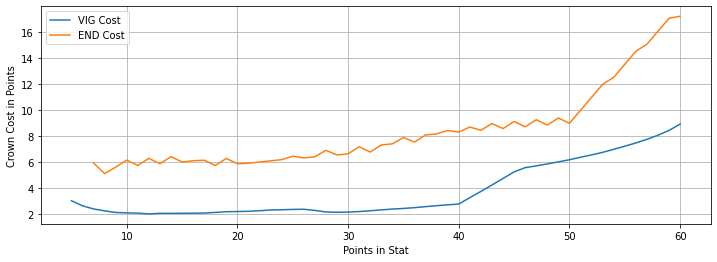

In [3]:
cost_plot = df.loc[:60,['VIG Cost', 'END Cost']].plot(figsize=(12,4))
cost_plot.grid(True)
cost_plot.set_xlabel('Points in Stat')
cost_plot.set_ylabel('Crown Cost in Points')

Vigor costs remain between 2-3 up to 40 Vigor. Endurance costs start at 6 and increase from there. It seems that the
only viable precondition for equipping the crown is an excessive amount of Stamina. Considering that the situations
most desperate for extra Intelligence often also require a lot of casting and rolling, it is the conclusion of this notebook
that the Twinsage Clintstone Crown is situational at best, and in general simply not worth it.

I hope this was useful. Feel free to download this notebook and play around. If I made a mistake or there is
room for improvement, PRs are always welcome :).